<a href="https://colab.research.google.com/github/Sheng-colab/SASL-translator/blob/main/SASLT_2_0_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,2.043420,1.595880,0.392157,01:49


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,1.507885,1.199307,0.549020,02:08
1,1.334347,0.894972,0.647059,02:06
2,1.162185,0.802191,0.705882,02:07
3,1.041537,0.979311,0.725490,02:07
4,0.966779,1.076884,0.745098,02:11
5,0.884045,1.131011,0.686275,02:08
6,0.825214,1.078239,0.745098,02:05
7,0.771194,1.072935,0.705882,02:09
8,0.723048,0.996965,0.745098,02:08
9,0.682836,0.899296,0.784314,02:06


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

epoch,train_loss,valid_loss,accuracy,time
0,0.340563,0.972921,0.764706,01:32


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.388621,0.932835,0.745098,02:06
1,0.381148,0.921324,0.764706,02:08
2,0.335666,0.941912,0.823529,02:04
3,0.379963,0.911636,0.784314,02:07
4,0.377706,0.999558,0.784314,02:05
5,0.383662,1.076629,0.784314,02:06
6,0.369674,0.909504,0.823529,02:07
7,0.356590,0.871712,0.784314,02:07
8,0.345769,1.024552,0.764706,02:05
9,0.338595,1.001395,0.784314,02:11


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

<IPython.core.display.Javascript object>

NotAllowedError: Permission denied by system


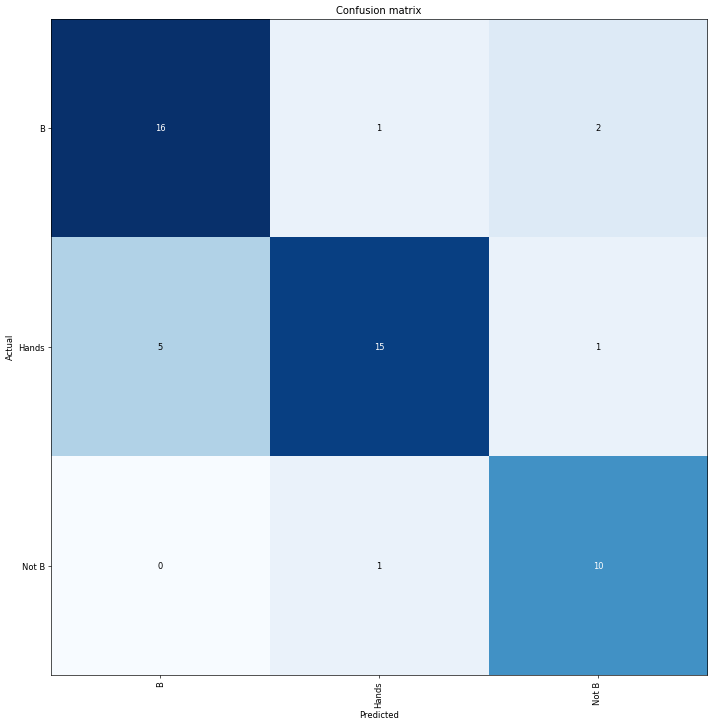

In [1]:
import fastai
from fastai.vision.all import *
from google.colab import drive
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

drive.mount('/content/drive')
data_path = Path('/content/drive/My Drive/Hands')
bs = 50
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)],
)
dls = dblock.dataloaders(data_path, bs=bs)

learn = cnn_learner(dls, resnet34, metrics=accuracy)


learn.fine_tune(15)
learn.export()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

learn.unfreeze()

learn.fine_tune(30)


In [8]:
from PIL import Image as PILImage
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
from fastai.vision.all import *

# Define a function to capture an image from the webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    display(Image(filename))

    # Load the Fastai model
    learn = load_learner('content/drive/My Drive/Hands')  # Replace with the actual path to your model directory

    # Open the image using Fastai's PILImage.create
    img = PILImage.create(filename)

    # Make a prediction using the loaded model
    pred, _, _ = learn.predict(img)
    print(f"This is: {str(pred)}")

except Exception as err:
    print(str(err))


<IPython.core.display.Javascript object>

TypeError: Cannot read properties of null (reading 'drawImage')
